<IPython.core.display.Javascript object>


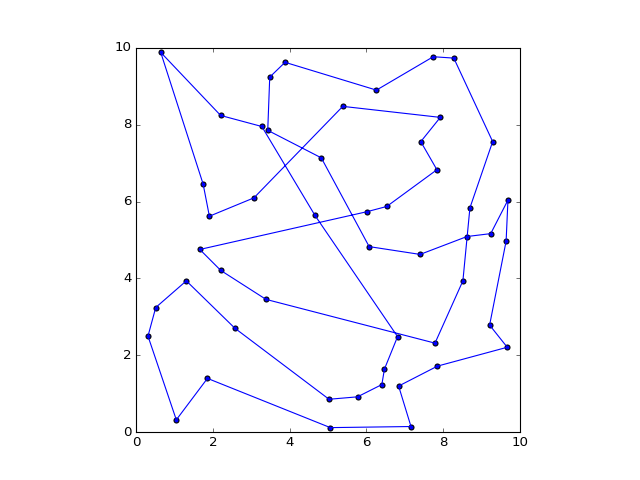

1.7261607107863532

In [91]:
import random
import matplotlib.pyplot as plt
import pylab
import operator
import math

%matplotlib notebook

xsize=10
ysize=10

def makeCities(n=50):
    cities=[]
    for i in range(0,n):
        cities.append((i,xsize*random.random(),ysize*random.random()))
    return cities

def plotCities(cities):
    x=[city[1] for city in cities]
    y=[city[2] for city in cities]
    
    plt.scatter(x,y)
        
def plotConnections(cities, connections):
    x=[]
    y=[]
    for c in range(0,len(connections)):
        i=connections[c]
        j=connections[(c+1)%len(connections)]
        x.append(cities[i][1])
        x.append(cities[j][1])
        y.append(cities[i][2])
        y.append(cities[j][2])
    plt.plot(x,y)
    
def connectCities(cities):
    return list(range(0,len(cities)))
    
def pathLength(cities, connections):
    length=0
    for c in range(0,len(connections)):
        i=connections[c]
        j=connections[(c+1)%len(connections)]
        x1=cities[i][1]
        x2=cities[j][1]
        y1=cities[i][2]
        y2=cities[j][2]
        length+=math.sqrt((x1-x2)**2+(y1-y2)**2)
    return length

def avgConnectionLength(cities, connections):
    length = pathLength(cities, connections)
    return length/len(cities)

def optimizeStep(cities, connections, temperature, length):
    newConns = list(connections)
    for n in range(0,1):
        i = random.randint(0,len(connections) - 1)
        j = random.randint(0,len(connections) - 1)
        newConns[i],newConns[j] = newConns[j],newConns[i]
    newLength = pathLength(cities, newConns)
    delta = (newLength - length) / length
    if delta > temperature:
        return (length, connections)
    else:
        return (newLength, newConns)

def optimize(cities, connections, steps=100000, decay=1000):
    length = pathLength(cities, connections)
    for i in range(0, steps):
        temperature = math.exp(-i/decay)
        length, connections = optimizeStep(cities, connections, temperature, length)
    return connections

cities = makeCities()
connections = connectCities(cities)

connections = optimize(cities, connections)

plt.ylim((0,ysize))
plt.xlim((0,xsize))
plt.axes().set_aspect('equal')
plotCities(cities)
plotConnections(cities,connections)
plt.show()

avgConnectionLength(cities, connections)